<a href="https://colab.research.google.com/github/daniel-neves-dev/alura_telecom_p1/blob/main/TelecomX_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💾 Data dictionary:

customerID: unique identification number for each client

Churn: whether the customer left the company or not

gender: gender (male and female)

SeniorCitizen: information about whether a customer is 65 years of age or older

Partner: whether the customer has a partner or not

Dependents: whether the customer has dependents or not

tenure: customer's contract months

PhoneService: telephone service subscription

MultipleLines: subscription for more than one telephone line

InternetService: subscription to an internet provider

OnlineSecurity: additional online security subscription

OnlineBackup: additional online backup subscription

DeviceProtection: additional device protection subscription

TechSupport: additional technical support subscription, less waiting time

StreamingTV: cable TV subscription

StreamingMovies: movie streaming subscription

Contract: type of contract

PaperlessBilling: whether the customer prefers to receive the invoice online

PaymentMethod: form of payment

Charges.Monthly: total of all the customer's services per month

Charges.Total: total amount spent by the customer

#💽Imports

In [2]:
pip install great_tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from great_tables import GT, md, html, vals, loc, style, exibble

#🗃️ Data Extraction

In [4]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Normalizing the data frame
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Add customerID to each normalized dataframe for merging
customer_df['customerID'] = df['customerID']
phone_df['customerID'] = df['customerID']
internet_df['customerID'] = df['customerID']
account_df['customerID'] = df['customerID']

# Merge the dataframes
df = df[['customerID', 'Churn']].merge(customer_df, on='customerID').merge(phone_df, on='customerID').merge(internet_df, on='customerID').merge(account_df, on='customerID')

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df.columns = df.columns.str.lower().str.replace('.','_')
df = df.rename(columns={'customerid':'customer_id','seniorcitizen':'senior_citizen','phoneservice':'phone_service','multiplelines':'multiple_lines','internetservice':'internet_service',
          'onlinesecurity':'online_security','onlinebackup':'online_backup','deviceprotection':'device_protection','techsupport':'tech_support',
          'streamingtv':'streaming_tv','streamingmovies':'streaming_movies','paperlessbilling':'paper_less_billing','paymentmethod':'payment_method'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7267 non-null   object 
 1   churn               7267 non-null   object 
 2   gender              7267 non-null   object 
 3   senior_citizen      7267 non-null   int64  
 4   partner             7267 non-null   object 
 5   dependents          7267 non-null   object 
 6   tenure              7267 non-null   int64  
 7   phone_service       7267 non-null   object 
 8   multiple_lines      7267 non-null   object 
 9   internet_service    7267 non-null   object 
 10  online_security     7267 non-null   object 
 11  online_backup       7267 non-null   object 
 12  device_protection   7267 non-null   object 
 13  tech_support        7267 non-null   object 
 14  streaming_tv        7267 non-null   object 
 15  streaming_movies    7267 non-null   object 
 16  contra

In [8]:
df['daily_accounts'] = (df.charges_monthly/30.44).round(2)
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paper_less_billing,payment_method,charges_monthly,charges_total,daily_accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.76


### 🤖 Data processing

In [9]:
for col in df.columns:
  print(f'Quantity of unique values on columns "{col}": {df[col].nunique()}')
  if df[col].nunique() <50:
    print(df[col].unique())
  print(100*'-')

Quantity of unique values on columns "customer_id": 7267
----------------------------------------------------------------------------------------------------
Quantity of unique values on columns "churn": 3
['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
Quantity of unique values on columns "gender": 2
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Quantity of unique values on columns "senior_citizen": 2
[0 1]
----------------------------------------------------------------------------------------------------
Quantity of unique values on columns "partner": 2
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Quantity of unique values on columns "dependents": 2
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Quantity of un

In [10]:
df['charges_total'] = pd.to_numeric(df['charges_total'], errors='coerce')
df["charges_total"] = df["charges_total"].fillna(0)


In [11]:
for col in df.columns:
  print(f'Quantity of null values in column "{col}": {df[col].isnull().sum()}')
  print(50*'-')

Quantity of null values in column "customer_id": 0
--------------------------------------------------
Quantity of null values in column "churn": 0
--------------------------------------------------
Quantity of null values in column "gender": 0
--------------------------------------------------
Quantity of null values in column "senior_citizen": 0
--------------------------------------------------
Quantity of null values in column "partner": 0
--------------------------------------------------
Quantity of null values in column "dependents": 0
--------------------------------------------------
Quantity of null values in column "tenure": 0
--------------------------------------------------
Quantity of null values in column "phone_service": 0
--------------------------------------------------
Quantity of null values in column "multiple_lines": 0
--------------------------------------------------
Quantity of null values in column "internet_service": 0
---------------------------------------

In [12]:
churn_filter = df[df['churn'].isin(['Yes','No'])].copy()
churn_filter['churn'] = churn_filter['churn'].replace({'No': 'Retained', 'Yes': 'Churned'})

# 📊 Analyzes

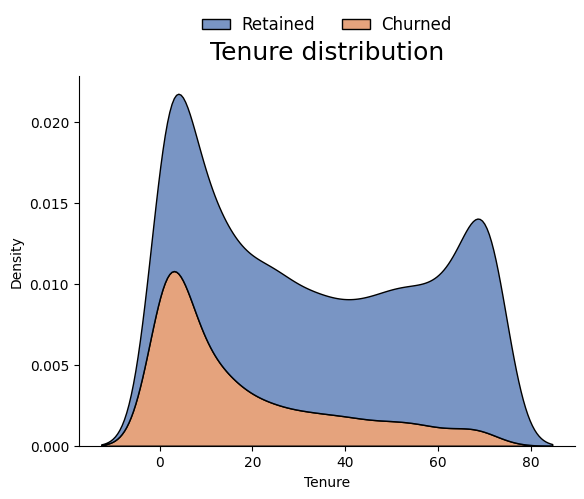

In [13]:
ax = sns.kdeplot(data=churn_filter, x="tenure", hue="churn", multiple="stack",
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})


sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.set_title('Tenure distribution', fontsize=18, pad=12)
ax.set_xlabel('Tenure')
ax.spines[['top', 'right']].set_visible(False)

plt.show()

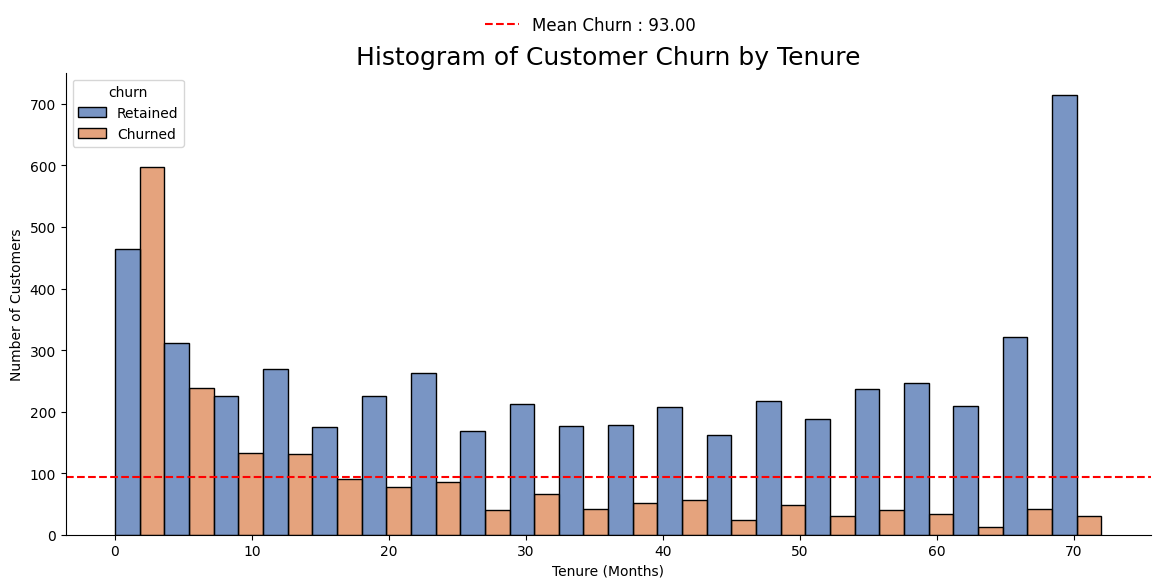

In [14]:
counts, bins = np.histogram(df[df['churn']=='Yes']['tenure'], bins=20)
mean_churn_count = counts.mean().round(0)

fig, ax1 = plt.subplots(figsize=(14,6))

sns.histplot(ax=ax1, data=churn_filter, x="tenure", hue="churn", bins=20, multiple='dodge', shrink=1, palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})
line = ax1.axhline(y=mean_churn_count, color='red', linestyle='--', label=f'Mean Churn : {mean_churn_count:.2f}')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels + [line.get_label()], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False, fontsize=12)

ax1.spines[['top', 'right']].set_visible(False)
ax1.set_title('Histogram of Customer Churn by Tenure', fontsize=18)
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Number of Customers')

plt.show()

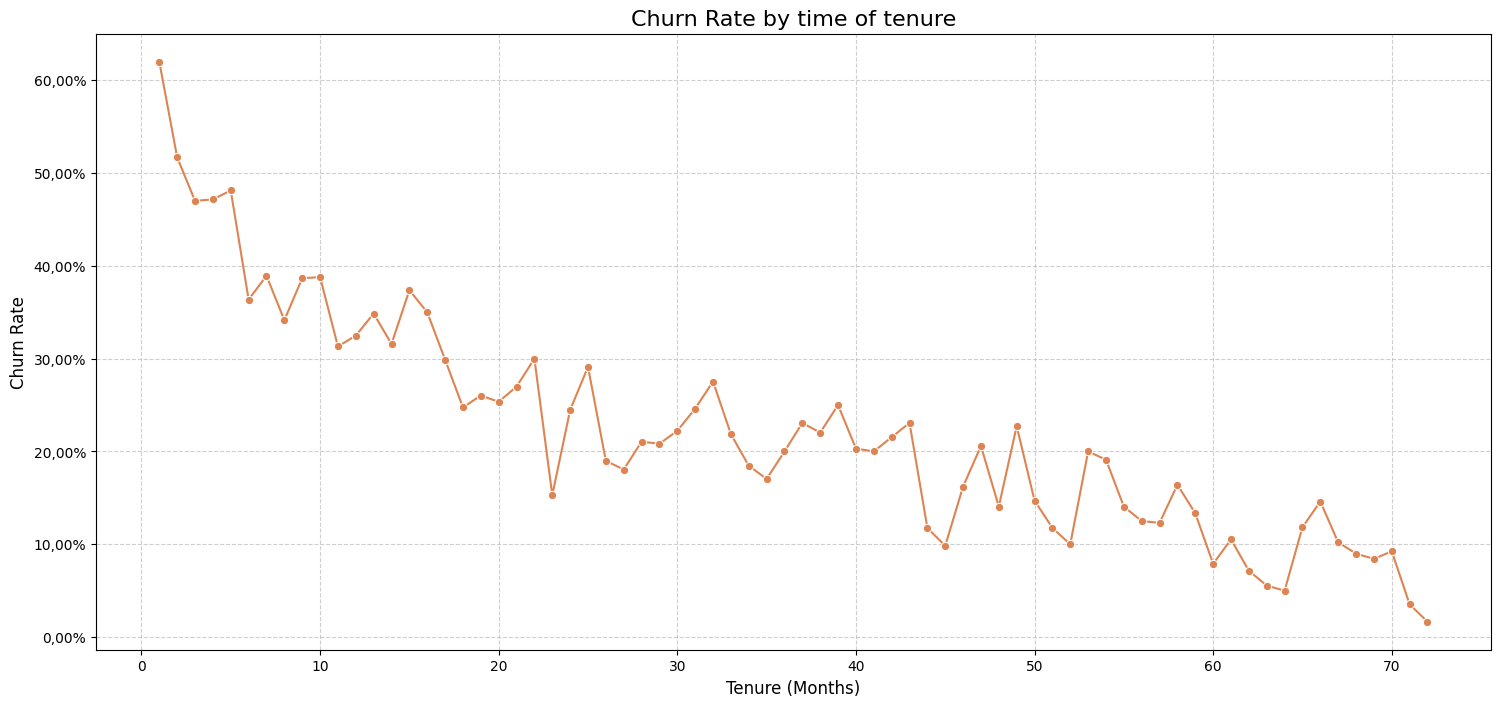

In [15]:
churn_rate_by_tenure = (churn_filter.groupby('tenure')['churn'].value_counts(normalize=True)*100).unstack()

plt.figure(figsize=(18, 8))
sns.lineplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure['Churned'], marker='o', color='#dd8452')

ax = plt.gca()
formatter = mtick.FuncFormatter(lambda y, _: f'{y:.2f}'.replace('.', ',') + '%')
ax.yaxis.set_major_formatter(formatter)

plt.title('Churn Rate by time of tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##Overall churn rate?

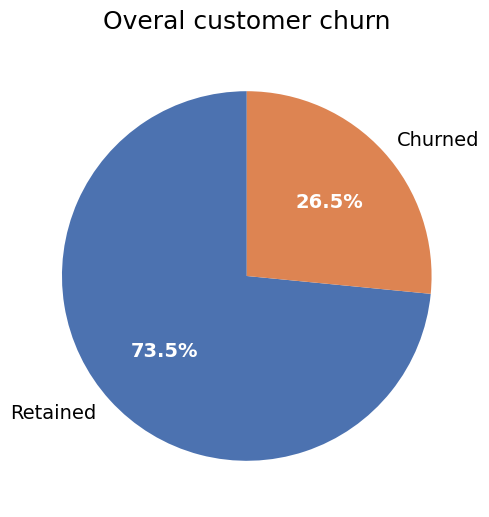

In [34]:
churn_rate = round((churn_filter.churn.value_counts(normalize= True)*100),2).to_frame()
colors = ['#4c72b0', '#dd8452']

fig, ax = plt.subplots(figsize=(9,6))

wedges, texts, autotexts = ax.pie(
    churn_rate['proportion'], labels=churn_rate.index, autopct='%1.1f%%', startangle=90,
    colors=colors
)

plt.setp(autotexts, size=14, weight='bold', color='w')
plt.setp(texts, size=14)

ax.set_title('Overal customer churn', fontsize=18, pad=12)
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

## Churn rating by gender

In [17]:
sex_churn_rate = round(churn_filter.groupby('gender')[['churn']].value_counts(normalize=True)*100,2).reset_index()
pivoted_table = sex_churn_rate.pivot(index="gender",columns="churn",values="proportion").reset_index()

(
    GT(pivoted_table)
    .tab_header(
        title="Churn Rate by Gender",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        gender="Gender",

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn  gender  Churned  Retained
0      Female    26.92     73.08
1        Male    26.16     73.84, _body=<great_tables._gt_data.Body object at 0x7e26555ccd90>, _boxhead=Boxhead([ColInfo(var='gender', type=<ColInfoTypeEnum.default: 1>, column_label='Gender', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e26550fca10>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Gender', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e2654002650>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e26554a4390>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='v

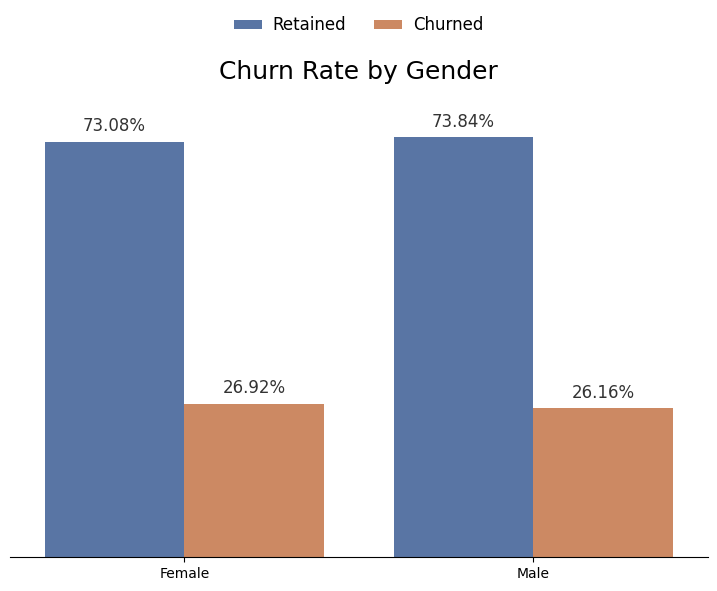

In [18]:
fig, ax = plt.subplots(figsize=(9,6))

sns.barplot(data=sex_churn_rate, ax=ax, x='gender', y='proportion', hue='churn',
            palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax.containers:
  ax.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.set_title('Churn Rate by Gender', fontsize=18, pad=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_ylim(0, max(sex_churn_rate.proportion)*1.1)
ax.yaxis.set_visible(False)
ax.set_xlabel('')
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

## Churn rating by senior citizen

In [19]:
churn_sitizien = (df.assign(senior_status = churn_filter.senior_citizen.map({0:'Under 65 years old', 1:'From 65 years old'}))
                .groupby('senior_status')[['churn']].value_counts(normalize=True).mul(100).round(2)).to_frame().reset_index()

s_pivoted_table = churn_sitizien.pivot(index="senior_status",columns="churn",values="proportion").reset_index()

(
    GT(s_pivoted_table)
    .tab_header(
        title="Churn Rate Senior Status",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["No", "Yes"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Yes",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        senior_status="Senior Status",
        No = 'Retained',
        Yes= 'Churned'
    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)


GT(_tbl_data=churn       senior_status     No    Yes
0       From 65 years old  58.32  41.68
1      Under 65 years old  76.39  23.61, _body=<great_tables._gt_data.Body object at 0x7e2655183150>, _boxhead=Boxhead([ColInfo(var='senior_status', type=<ColInfoTypeEnum.default: 1>, column_label='Senior Status', column_align='left', column_width=None), ColInfo(var='No', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Yes', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e2655948150>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['No', 'Yes'], built=None)]), _heading=Heading(title='Churn Rate Senior Status', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Yes', rows=[0], mask=None), grpname=None, colname='Yes', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Yes', rows=[1], mask=None), grpname=None, colname='Yes', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e2653db05d0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e2653dc69d0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type

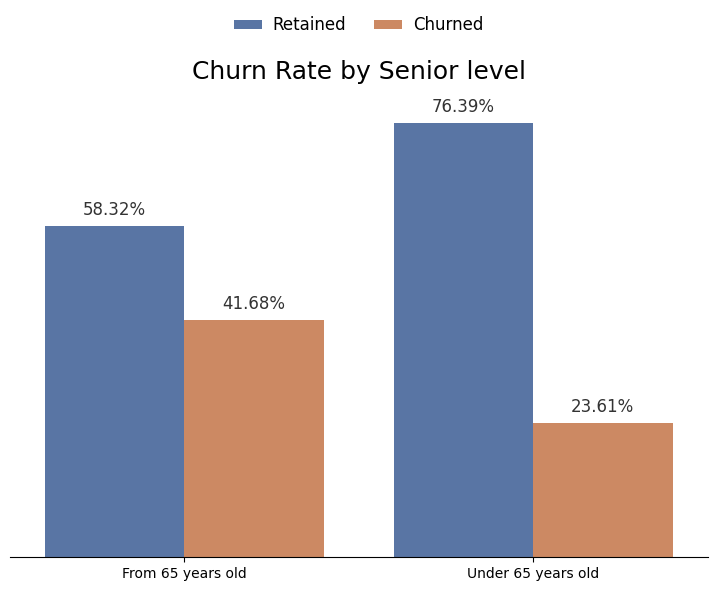

In [20]:
churn_sitizien['churn'] = churn_sitizien['churn'].replace({'No': 'Retained', 'Yes': 'Churned'})
fig, ax = plt.subplots(figsize=(9,6))

ax = sns.barplot(data=churn_sitizien, x='senior_status', y='proportion', hue='churn',
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax.containers:
  ax.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_title('Churn Rate by Senior level', fontsize=18, pad=12)
ax.set_xlabel('')
ax.set_ylim(0, max(sex_churn_rate.proportion)*1.1)
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

## Contract and Payment Analysis

### Churn rating by contract type

In [21]:
contract_churn_rate = round(churn_filter.groupby('contract')[['churn']].value_counts(normalize=True)*100,2).to_frame().reset_index()
c_pivoted_table = contract_churn_rate.pivot(index="contract",columns="churn",values="proportion").reset_index()

(
    GT(c_pivoted_table)
    .tab_header(
        title="Churn Rate by Contract Type",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        contract="Contract",

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn        contract  Churned  Retained
0      Month-to-month    42.71     57.29
1            One year    11.27     88.73
2            Two year     2.83     97.17, _body=<great_tables._gt_data.Body object at 0x7e2653c1e850>, _boxhead=Boxhead([ColInfo(var='contract', type=<ColInfoTypeEnum.default: 1>, column_label='Contract', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e2653dc0dd0>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Contract Type', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#f8c5c7')]), StyleInfo(locname=LocBody(columns='Churned', rows=[2], mask=None), grpname=None, colname='Churned', rownum=2, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e2653aaeb10>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e2653e1fbd0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, c

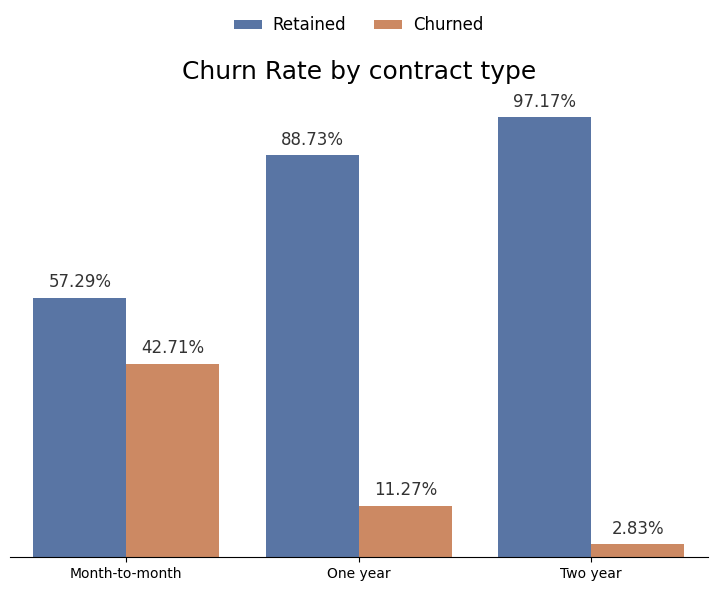

In [22]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.barplot(data=contract_churn_rate, x='contract', y='proportion', hue='churn',
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax.containers:
  ax.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_title('Churn Rate by contract type', fontsize=18, pad=12)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

In [23]:
payment_churn_rate = round(churn_filter.groupby('payment_method')[['churn']].value_counts(normalize=True)*100,2).to_frame().reset_index()
p_pivoted_table = payment_churn_rate.pivot(index="payment_method", columns="churn", values="proportion").reset_index()

(
    GT(p_pivoted_table)
    .tab_header(
        title="Churn Rate by Payment Method",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        payment_method="Payment Method",

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn             payment_method  Churned  Retained
0      Bank transfer (automatic)    16.71     83.29
1        Credit card (automatic)    15.24     84.76
2               Electronic check    45.29     54.71
3                   Mailed check    19.11     80.89, _body=<great_tables._gt_data.Body object at 0x7e2653933dd0>, _boxhead=Boxhead([ColInfo(var='payment_method', type=<ColInfoTypeEnum.default: 1>, column_label='Payment Method', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e26539c3c50>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Payment Method', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fce2e2')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')]), StyleInfo(locname=LocBody(columns='Churned', rows=[2], mask=None), grpname=None, colname='Churned', rownum=2, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[3], mask=None), grpname=None, colname='Churned', rownum=3, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fad4d5')])], _locale=<great_tables._gt_data.Locale object at 0x7e26538cdd90>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e26550b0110>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', va

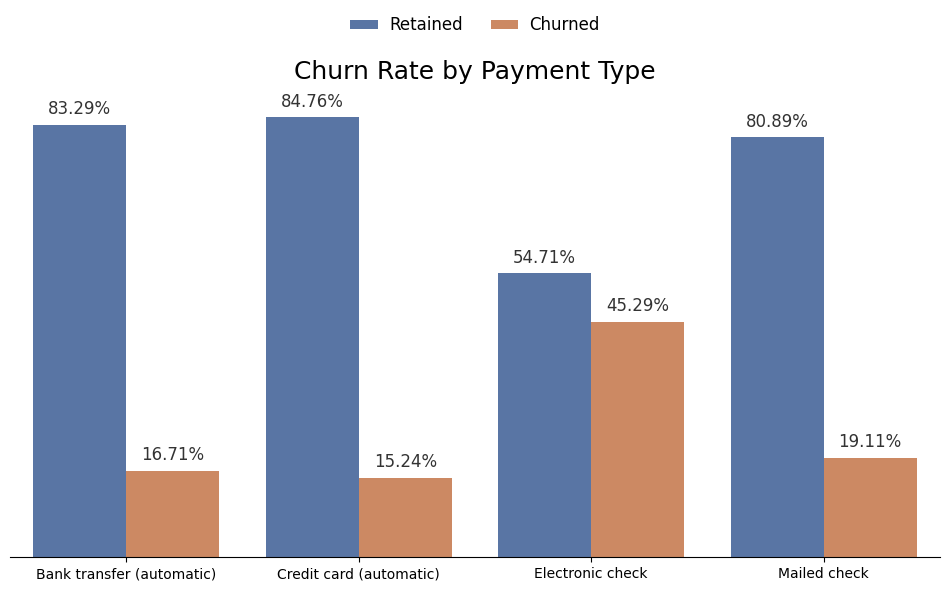

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=payment_churn_rate, x='payment_method', y='proportion', hue='churn',
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax.containers:
  ax.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_title('Churn Rate by Payment Type', fontsize=18, pad=12)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

### Total charged

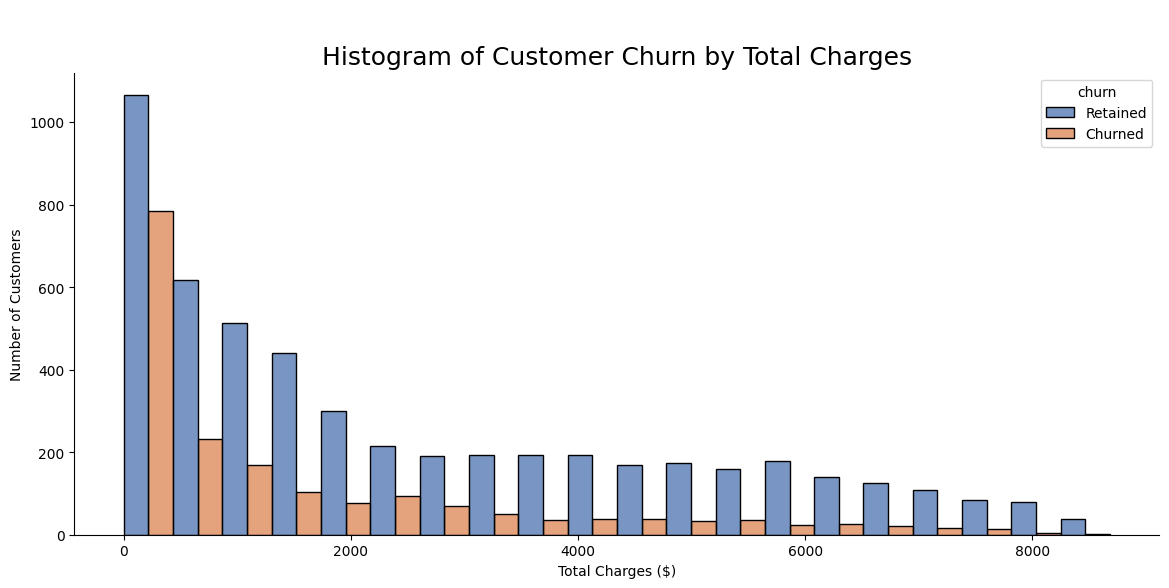

In [25]:
counts, bins = np.histogram(df[df['churn']=='Yes']['charges_total'], bins=20)
mean_churn_count = counts.mean().round(0)

fig, ax1 = plt.subplots(figsize=(14,6))

sns.histplot(ax=ax1, data=churn_filter, x="charges_total", hue="churn", bins=20, multiple='dodge', shrink=1, palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels + [line.get_label()], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False, fontsize=12)


ax1.spines[['top', 'right']].set_visible(False)
ax1.set_title('Histogram of Customer Churn by Total Charges', fontsize=18)
ax1.set_xlabel('Total Charges ($)')
ax1.set_ylabel('Number of Customers')

plt.show()

## Service and Add-on Analysis

### Internet Service

In [26]:
internet_churn_rate = round(churn_filter.groupby('internet_service')[['churn']].value_counts(normalize=True)*100,2).to_frame().reset_index()
internet_churn_rate.internet_service = internet_churn_rate.internet_service.replace({'No':'No internet Service'})
i_pivoted_table = internet_churn_rate.pivot(index="internet_service", columns="churn", values="proportion").reset_index()

(
    GT(i_pivoted_table)
    .tab_header(
        title="Churn Rate by Payment Method",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        internet_service="Internet Service",

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn     internet_service  Churned  Retained
0                      DSL    18.96     81.04
1              Fiber optic    41.89     58.11
2      No internet Service     7.40     92.60, _body=<great_tables._gt_data.Body object at 0x7e2653656dd0>, _boxhead=Boxhead([ColInfo(var='internet_service', type=<ColInfoTypeEnum.default: 1>, column_label='Internet Service', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e26535de390>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Payment Method', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#f5afb3')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[2], mask=None), grpname=None, colname='Churned', rownum=2, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e2653de0950>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e26534a0d10>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border

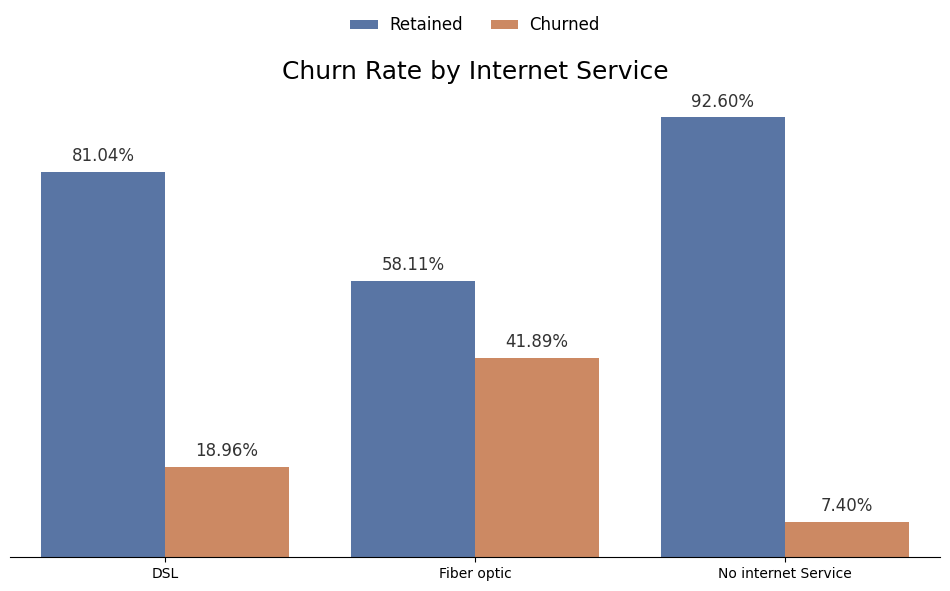

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=internet_churn_rate, x='internet_service', y='proportion', hue='churn',
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax.containers:
  ax.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, title=None, frameon=False)
for text in ax.legend_.texts:
    text.set_fontsize(12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax.set_title('Churn Rate by Internet Service', fontsize=18, pad=12)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

## Customer Profile

###Dependents

In [28]:
dependents_churn_rate = round(churn_filter.groupby('dependents')[['churn']].value_counts(normalize=True)*100,2).to_frame().reset_index()
dependents_churn_rate.dependents = dependents_churn_rate.dependents.replace({'No':'Does not have dependents', 'Yes':'Has dependents'})
d_pivoted_table = dependents_churn_rate.pivot(index="dependents", columns="churn", values="proportion").reset_index()

(
    GT(d_pivoted_table)
    .tab_header(
        title="Churn Rate by Dependents",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        dependents="Dependents"

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn                dependents  Churned  Retained
0      Does not have dependents    31.28     68.72
1                Has dependents    15.45     84.55, _body=<great_tables._gt_data.Body object at 0x7e265324ed10>, _boxhead=Boxhead([ColInfo(var='dependents', type=<ColInfoTypeEnum.default: 1>, column_label='Dependents', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e265322dfd0>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Dependents', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e26530d7950>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e2653203e90>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_bo

###Partner

In [29]:
pertner_churn_rate = round(churn_filter.groupby('partner')[['churn']].value_counts(normalize=True)*100,2).to_frame().reset_index()
pertner_churn_rate.partner = pertner_churn_rate.partner.replace({'No':'Does not have partner', 'Yes':'Has partner'})
p_pivoted_table = pertner_churn_rate.pivot(index="partner", columns="churn", values="proportion").reset_index()

(
    GT(p_pivoted_table)
    .tab_header(
        title="Churn Rate by Dependents",
    )
    .tab_spanner(
        label="Churn Status",
        columns=["Retained", "Churned"]
    )
    .fmt_number(
        columns=["Retained", "Churned"],
        decimals=2,
        pattern="{x} %"
    )
    .data_color(
        columns="Churned",
        palette=["#fdebea", "#e63946"]
    )
    .cols_label(
        partner="Partner"

    )
    .tab_options(
        heading_title_font_size="30px",
        column_labels_font_weight="bold",
        column_labels_font_size="20px",
        table_font_size='20px',
        table_border_top_style="hidden",
        table_border_bottom_style="hidden"
    )

)

GT(_tbl_data=churn                partner  Churned  Retained
0      Does not have partner    32.96     67.04
1                Has partner    19.66     80.34, _body=<great_tables._gt_data.Body object at 0x7e26532141d0>, _boxhead=Boxhead([ColInfo(var='partner', type=<ColInfoTypeEnum.default: 1>, column_label='Partner', column_align='left', column_width=None), ColInfo(var='Retained', type=<ColInfoTypeEnum.default: 1>, column_label='Retained', column_align='right', column_width=None), ColInfo(var='Churned', type=<ColInfoTypeEnum.default: 1>, column_label='Churned', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7e2653898490>, _spanners=Spanners([SpannerInfo(spanner_id='Churn Status', spanner_level=0, spanner_label='Churn Status', spanner_units=None, spanner_pattern=None, vars=['Retained', 'Churned'], built=None)]), _heading=Heading(title='Churn Rate by Dependents', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Churned', rows=[0], mask=None), grpname=None, colname='Churned', rownum=0, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#e63946')]), StyleInfo(locname=LocBody(columns='Churned', rows=[1], mask=None), grpname=None, colname='Churned', rownum=1, colnum=None, styles=[CellStyleText(color='#000000', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#fdebea')])], _locale=<great_tables._gt_data.Locale object at 0x7e2653136490>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7e26531394d0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='20px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_sty

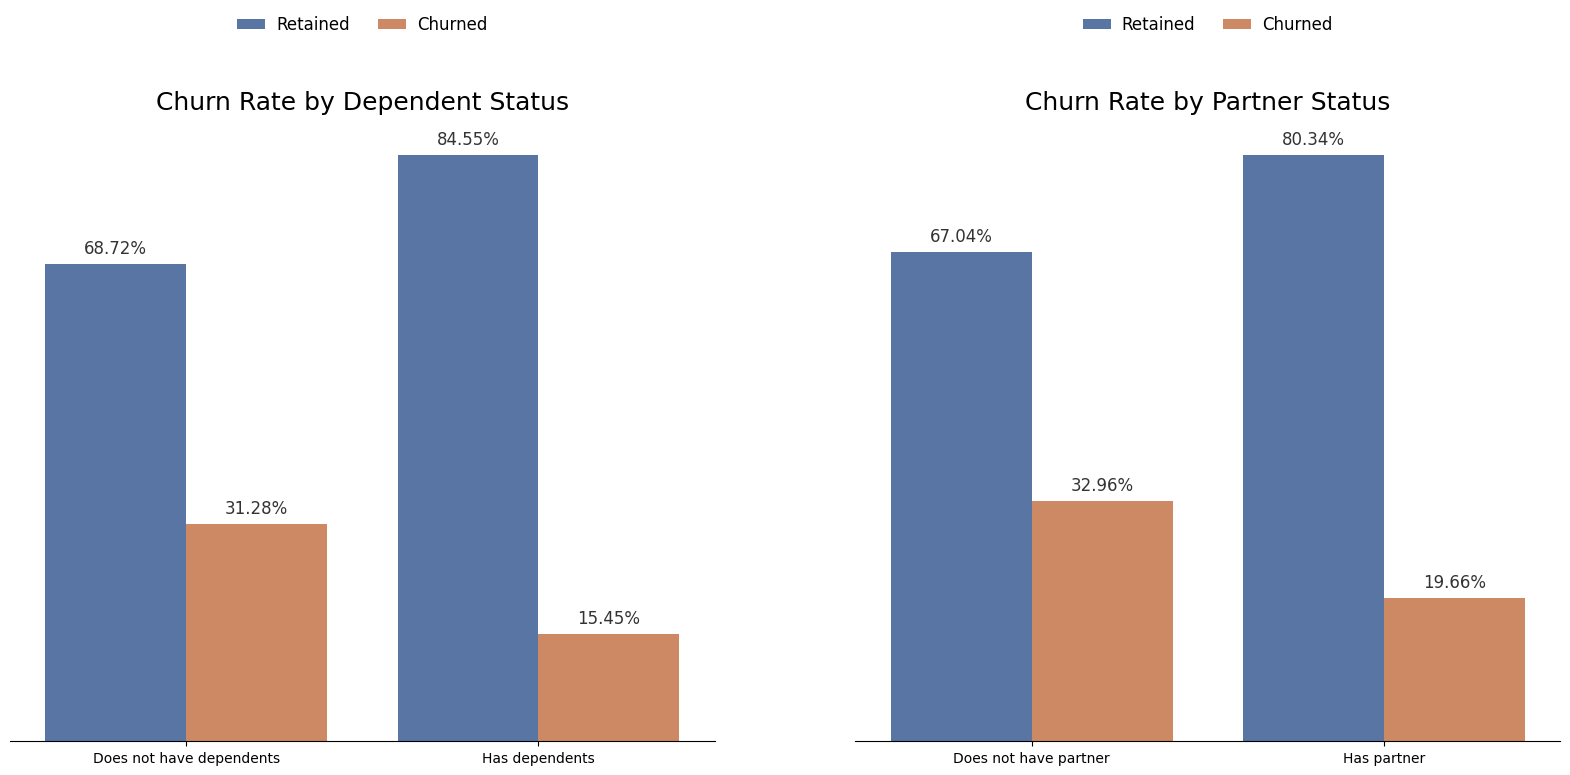

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.barplot(data=dependents_churn_rate, x='dependents', y='proportion', hue='churn', ax=ax1,
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax1.containers:
  ax1.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax1, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, title=None, frameon=False)
for text in ax1.legend_.texts:
    text.set_fontsize(12)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax1.set_title('Churn Rate by Dependent Status', fontsize=18, pad=12)
ax1.set_xlabel('')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.yaxis.set_visible(False)
ax1.spines[['top', 'left', 'right']].set_visible(False)

sns.barplot(data=pertner_churn_rate, x='partner', y='proportion', hue='churn', ax=ax2,
                 palette={'Retained': '#4c72b0', 'Churned': '#dd8452'})

for cont in ax2.containers:
  ax2.bar_label(cont, fmt='%.2f%%', label_type='edge', padding=5, fontsize=12, color='#333333')

sns.move_legend(ax2, 'upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, title=None, frameon=False)
for text in ax2.legend_.texts:
    text.set_fontsize(12)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax2.set_title('Churn Rate by Partner Status', fontsize=18, pad=12)
ax2.set_xlabel('')
# Explicitly set ticks before setting labels to avoid UserWarning
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.yaxis.set_visible(False)
ax2.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

#📑Final Report

###Conclusion

- Contract Time (Tenure):

The line graph, histogram, and KDE plot show the churn rate over time. The churn rate is highest in the first few months ***(10 to 15 months)*** and decreases significantly as customers stay longer. This highlights that the first year is a critical period for building customer loyalty.

- Contract Type and Payment Method:

Customers with a ***monthly contract*** have a much higher churn rate than those with one or two-year contracts. Similarly, customers who use electronic checks have a high attrition rate, both approaching 50%.

- Internet Services:

Regarding internet service, the highest concentration is among ***fiber optic*** users, who alone account for almost 50% of churn.

- Demographics and Profiles:

The analysis identifies that senior citizens ***65 years old or more***, are a high-risk demographic group, with a much higher churn rate than younger customers. Single people and those without children are more likely to cancel their subscriptions.


###Strategic Recommendations 💡

- Encourage annual contracts:

Offer discounts or benefits (a free month, higher connection speed, technical support, etc.) for customers on monthly plans to switch to one or two-year contracts.

- Improve new customer onboarding:

Create a dedicated program for customers in their first 3 to 6 months to ensure they have a positive experience and understand the value of the services. Offer "Adhesion" service packages such as Technical Support and Online Security, especially for new customers or those on monthly plans.

- Targeted Retention for Seniors:

Develop specific communication or retention campaigns to meet the needs of senior citizens.

